# Mixtures of Gaussian processes with GPclust
A simple implementation of hierarchical GPs is available as part of GPy. You may also be interested in the related notebook on hierarchical GPs.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'#'svg' would be better, but eats memory for these big plots.
from matplotlib import pyplot as plt
import numpy as np
import GPy
import sys
sys.path.append('C:\Users\Fengwanwan\Documents\Python Scripts\GPclust-master')
import GPclust

warning in stationary: failed to import cython module: falling back to numpy


# A Simple line dataset

In [3]:
#generate a data set.Here's the line demo 
Nclust=3
Nx=100
Nb=10
X=np.linspace(0,1,Nx).reshape(Nx,1)

means=np.tile(np.array([[1],[3],[5]]),Nx).repeat([Nb for i in range(Nclust)],axis=0)

#add a lower frequency bias for the noise
offsets=0.01*(np.random.rand(means.shape[0])-.5).reshape(means.shape[0],1)
Y=means+offsets+np.random.randn(*means.shape)*0.05

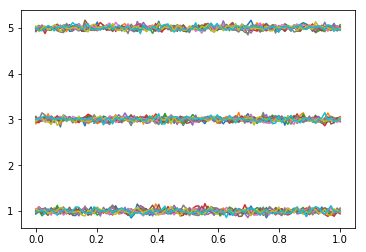

In [4]:
#plotting. 
for i in range(Y.shape[0]):
    plt.plot(X,Y[i,:])
plt.show()


# MOHGP with default

iteration 1 bound=-3397.395180547465 grad=10852.559738004196, beta=0
iteration 2 bound=-1779.1356445979563 grad=69169.10461245687, beta=0.13663437301453674
iteration 3 bound=-1779.1356445979563 grad=3.522856506537276e-66, beta=1.7930285702514542e-71
vb converged (ftol)
Running L-BFGS-B (Scipy implementation) Code:
  runtime   i    f              |g|        
    00s03  03  -3.005084e+03   1.550562e+06 
    00s11  11  -4.449674e+03   1.721101e+03 
    00s21  22  -4.533043e+03   1.365000e+03    00s17  17  -4.521620e+03   2.061716e+03  
Runtime:     00s21
Optimization status: Maximum number of f evaluations reached

vb converged (gtol)
Running L-BFGS-B (Scipy implementation) Code:
  runtime   i    f              |g|        
    00s00  01  -4.533043e+03   1.365000e+03 
    00s04  04  -4.533502e+03   1.503179e+00 
    00s12  13  -4.533572e+03   8.120175e-02    00s08  08  -4.533547e+03   4.183106e+01 
    00s21  22  -4.534150e+03   3.383936e+02    00s15  16  -4.533578e+03   3.136072e+00    00

 C:\Users\Fengwanwan\Documents\Python Scripts\GPclust-master\GPclust\collapsed_vb.py:164: RuntimeWarning:overflow encountered in double_scalars
 C:\Users\Fengwanwan\Documents\Python Scripts\GPclust-master\GPclust\collapsed_vb.py:167: RuntimeWarning:invalid value encountered in multiply
 D:\Anaconda2\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning:invalid value encountered in reduce
 D:\Anaconda2\lib\site-packages\GPy\util\linalg.py:60: RuntimeWarning:invalid value encountered in less_equal


    00s12  11  -4.536535e+03   2.419909e-02 
    00s22  22  -4.537327e+03   4.179259e+02    00s17  16  -4.536541e+03   2.716703e+00 
Runtime:     00s22
Optimization status: Maximum number of f evaluations reached

vb converged (gtol)
Running L-BFGS-B (Scipy implementation) Code:
  runtime   i    f              |g|        
    00s07  07  -4.537719e+03   3.563095e+02 
    00s14  14  -4.538123e+03   1.698429e-01   
    00s20  22  -4.538520e+03   1.203114e+02    00s19  20  -4.538409e+03   1.447864e+02 
Runtime:     00s20
Optimization status: Maximum number of f evaluations reached

iteration 15 bound=4538.526241983814 grad=0.008776097919346571, beta=0.0
iteration 16 bound=4538.528108333294 grad=0.0019355555849765763, beta=0.19293181584409574
iteration 17 bound=4538.529002845337 grad=0.0009412855068808765, beta=0.19585885164471187
iteration 18 bound=4538.529326780025 grad=0.0002480340304112802, beta=0.4708361361676359
iteration 19 bound=4538.529359680649 grad=4.197551144902036e-05, beta=0.0

 C:\Users\Fengwanwan\Documents\Python Scripts\GPclust-master\GPclust\collapsed_vb.py:164: RuntimeWarning:divide by zero encountered in double_scalars
 C:\Users\Fengwanwan\Documents\Python Scripts\GPclust-master\GPclust\collapsed_vb.py:164: RuntimeWarning:invalid value encountered in double_scalars


Running L-BFGS-B (Scipy implementation) Code:
  runtime   i    f              |g|        
    00s01  01  -4.539667e+03   3.213419e+01 
    00s05  05  -4.539678e+03   5.166734e-01 
    00s15  14  -4.539692e+03   5.062576e-03 
Runtime:     00s15
Optimization status: Converged



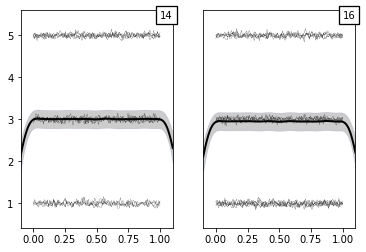

In [7]:
k_underlying = GPy.kern.RBF(input_dim=1, variance=0.1, lengthscale=0.1)
k_corruption = GPy.kern.RBF(input_dim=1, variance=0.01, lengthscale=0.1) + GPy.kern.White(1, variance=0.001)

m = GPclust.MOHGP(X, k_underlying, k_corruption, Y, prior_Z='DP', alpha=1)
m.plot()
m.optimize()
m.systematic_splits(verbose=False)

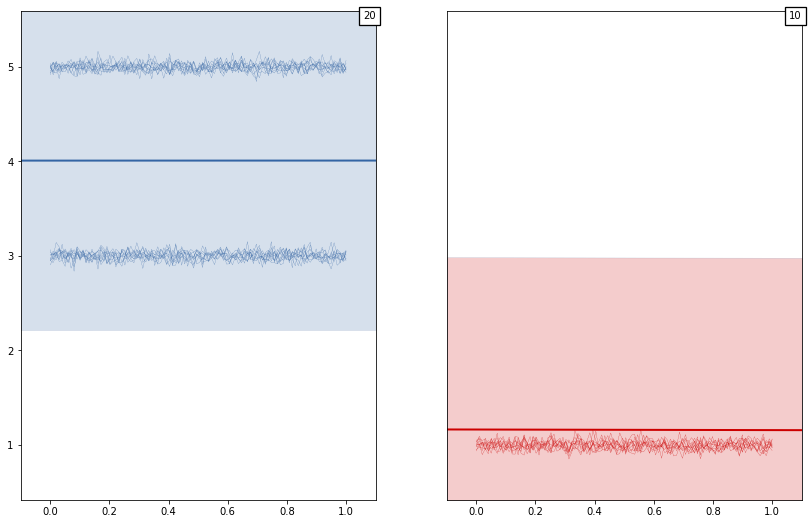

In [8]:
plt.figure(figsize=(14,9))
m.plot(on_subplots=True, colour=True, newfig=False)

# MOHGP with K=Nclust

In [5]:
k_underlying = GPy.kern.RBF(input_dim=1, variance=0.1, lengthscale=0.1)
k_corruption = GPy.kern.RBF(input_dim=1, variance=0.01, lengthscale=0.1) + GPy.kern.White(1, variance=0.001)

m = GPclust.MOHGP(X, k_underlying, k_corruption, Y, K=Nclust, prior_Z='DP', alpha=1.0)
m.optimize()
m.systematic_splits(verbose=False)

iteration 1 bound=897.3848805948543 grad=363713.6818975645, beta=0
iteration 2 bound=2543.5215987060637 grad=587319.0520054022, beta=0.20531190906992033
iteration 3 bound=2543.5215987060637 grad=8.978775135362595e-258, beta=1.2768700433370123e-263
vb converged (ftol)
Running L-BFGS-B (Scipy implementation) Code:
  runtime   i    f              |g|        
    00s02  02  -3.743531e+03   4.355195e+05 
    00s09  08  -4.574666e+03   8.588834e+03 
    00s13  12  -4.586860e+03   5.425593e+02 

 D:\Anaconda2\lib\site-packages\IPython\html.py:14: ShimWarning:The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.


    00s19  18  -4.586927e+03   5.404252e+02 
    00s25  28  -4.586927e+03   5.404250e+02 
Runtime:     00s25
Optimization status: Maximum number of f evaluations reached

vb converged (gtol)
Running L-BFGS-B (Scipy implementation) Code:
  runtime   i    f              |g|        
    00s03  03  -4.586642e+03   2.569977e+02     00s04  04  -4.586909e+03   4.404358e+02 
    00s15  15  -4.586927e+03   5.404247e+02  
    00s20  20  -4.586927e+03   5.404247e+02    00s19  19  -4.586927e+03   5.404247e+02 
Runtime:     00s20
Optimization status: Converged

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i    f              |g|        
    00s08  08  -4.586927e+03   1.230981e+03    00s02  02  -4.115484e+03   7.042153e+05 
    00s18  18  -4.586927e+03   1.231030e+03 
Runtime:     00s18
Optimization status: Converged

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i    f              |g|        
    00s01  01  -4.586927e+03   1.231029e+03    00s02  02  -4.115484e+03   7.04215

 D:\Anaconda2\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning:Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


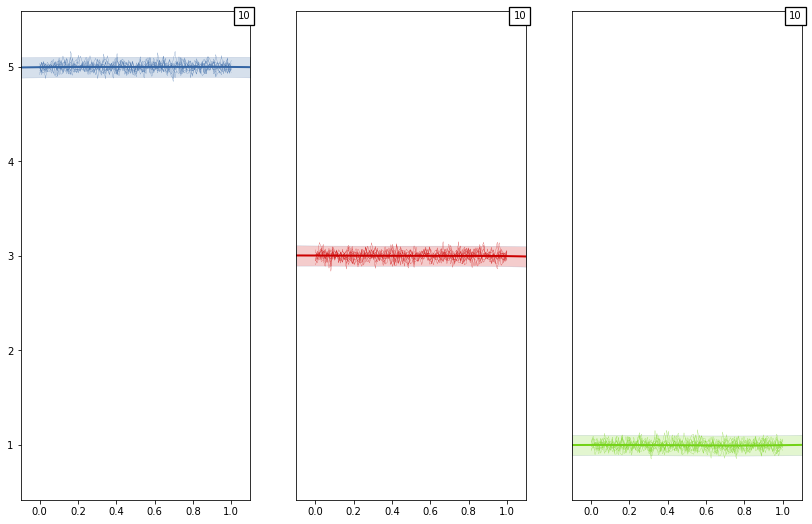

In [6]:
plt.figure(figsize=(14,9))
m.plot(on_subplots=True, colour=True, newfig=False)

# MOHGP alpha=10

In [9]:
k_underlying = GPy.kern.RBF(input_dim=1, variance=0.1, lengthscale=0.1)
k_corruption = GPy.kern.RBF(input_dim=1, variance=0.01, lengthscale=0.1) + GPy.kern.White(1, variance=0.001)

m = GPclust.MOHGP(X, k_underlying, k_corruption, Y, K=Nclust, prior_Z='DP', alpha=10)
m.optimize()
m.systematic_splits(verbose=False)

iteration 1 bound=1023.2609726122378 grad=654317.5643011052, beta=0
iteration 2 bound=2530.0482533589907 grad=708954.9309963805, beta=0.2672080821966253
iteration 3 bound=2530.0482533589907 grad=4.0543740152028917e-299, beta=1.0414587189905883e-304
vb converged (ftol)
Running L-BFGS-B (Scipy implementation) Code:
  runtime   i    f              |g|        
    00s04  03  -3.946682e+03   1.949567e+05 
    00s14  13  -4.573447e+03   5.406412e+02 
    00s26  28  -4.573454e+03   5.404260e+02 
Runtime:     00s26
Optimization status: Maximum number of f evaluations reached

vb converged (gtol)
Running L-BFGS-B (Scipy implementation) Code:
  runtime   i    f              |g|        
    00s03  03  -4.573169e+03   2.569981e+02    00s01  01  -4.573454e+03   5.404261e+02 
    00s11  11  -4.573454e+03   5.404255e+02  
    00s21  22  -4.573454e+03   5.404261e+02 
Runtime:     00s21
Optimization status: Maximum number of f evaluations reached

Running L-BFGS-B (Scipy implementation) Code:
  runtime

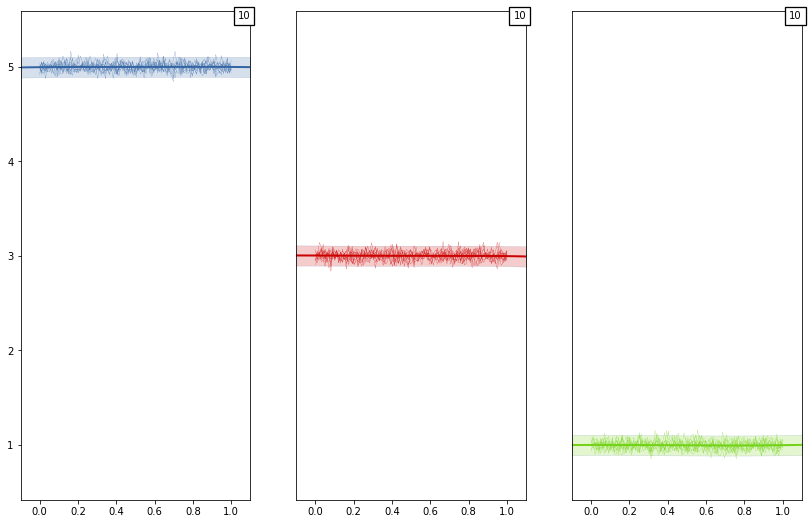

In [10]:
plt.figure(figsize=(14,9))
m.plot(on_subplots=True, colour=True, newfig=False)